
# Módulo 1: Paradigma procedural vs. orientado a objetos

 Este notebook é parte do curso de POO para Engenharia de Dados

# Construindo um modelo de Vazão Virtual

Imagine a segiunte tarefa:

- Criar um medidor virtual de vazão, a partir da medição de diferencial de pressão medidor.

In [57]:
import numpy as np

sinal_delta_P = np.random.uniform(low=1000, high=5000, size=100)  # Pa

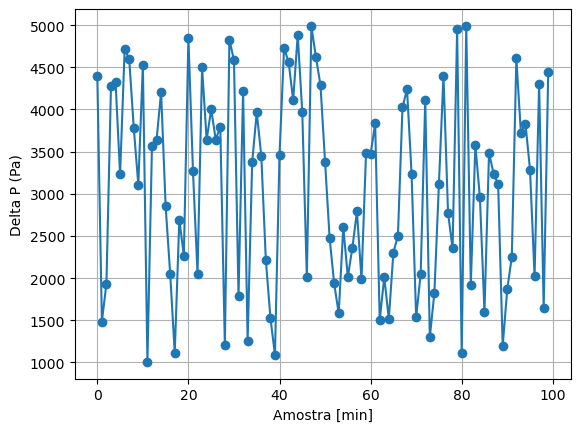

In [176]:
import matplotlib.pyplot as plt

plt.plot(sinal_delta_P, 'o-')
plt.xlabel('Amostra [min]')
plt.ylabel('Delta P (Pa)')
plt.grid()
plt.show()

## Modelo de vazão volumétrica simplificado:

Primeiramente, precisamos de um modelo

Aqui, consideremos as seguintes premissas de um modelo do tipo:

$$Q = C_d \cdot Y \cdot A \cdot \sqrt{\frac{2 \cdot \Delta P}{\rho}} \quad \text{(eq.1)}$$

onde:

- $C_d$ = coeficiente de descarga (adimensional)
- $Y$ = fator de compressibilidade (adimensional) 
- $A$ = área efetiva do orifício (m²)
- $\Delta P$ = diferencial de pressão (Pa)
- $\rho$ = densidade do fluido (kg/m³)


Vamos implementá-lo em uma função chamada calcula_vazao_massica

In [76]:
def calcula_vazao_volumetrica(Cd : float, Y: float, A: float, deltaP: float, rho: float) -> float:
    ''' Calcula a vazão mássica através de um orifício
        
        Parâmetros:    
            Cd (float): Coeficiente de descarga (adimensional)
            Y (float): Fator de compressibilidade (adimensional)
            A (float): Área efetiva do orifício (m2)
            deltaP (float): Queda de pressão (Pa)
            rho (float): Densidade do fluido (kg/m3)

        Retornos: 
            Q (float): Vazão volumétrica (m3/s)
            
        Exceções:
            AssertionError: Se Cd <= 0
    '''
    
    assert Cd > 0, "Cd deve ser maior que zero"
    
    Q = Cd * Y * (2 * deltaP / rho) ** 0.5

    return Q

Observações:

 - Padrão docstring é uma convenção para documentar funções, classes e módulos em Python. Acessível via help(função) ou função.__doc__, além de existirme ferramentas como SPhinx que geram documentação mais profissional. Obs.: Nem toda função merece uma documentação completa! Lembresse do KIS"

In [60]:
print(calcula_vazao_volumetrica.__doc__)

 Calcula a vazão mássica através de um orifício
        
        Parâmetros:    
            Cd (float): Coeficiente de descarga (adimensional)
            Y (float): Fator de expansibilidade (adimensional)
            A (float): Área efetiva do orifício (m2)
            deltaP (float): Queda de pressão (Pa)
            rho (float): Densidade do fluido (kg/m3)

        Retornos: 
            Q (float): Vazão volumétrica (m3/s)
            
        Exceções:
            AssertionError: Se Cd <= 0
    


In [61]:
print(np.random.uniform.__doc__)


        uniform(low=0.0, high=1.0, size=None)

        Draw samples from a uniform distribution.

        Samples are uniformly distributed over the half-open interval
        ``[low, high)`` (includes low, but excludes high).  In other words,
        any value within the given interval is equally likely to be drawn
        by `uniform`.

        .. note::
            New code should use the `~numpy.random.Generator.uniform`
            method of a `~numpy.random.Generator` instance instead;
            please see the :ref:`random-quick-start`.

        Parameters
        ----------
        low : float or array_like of floats, optional
            Lower boundary of the output interval.  All values generated will be
            greater than or equal to low.  The default value is 0.
        high : float or array_like of floats
            Upper boundary of the output interval.  All values generated will be
            less than or equal to high.  The high limit may be included in the 
 

 - Os Type Hints foram introduzidos no Python 3.5 (PEP 484) e são considerados uma boa prática em código Python moderno, especialmente em projetos maiores.

In [62]:
calcula_vazao_volumetrica.__annotations__

{'Cd': float,
 'Y': float,
 'A': float,
 'deltaP': float,
 'rho': float,
 'return': float}

In [63]:
try:
    calcula_vazao_volumetrica(1,1,1,'5',1)
except Exception as e:
    print(f"Erro: {e}")

Erro: unsupported operand type(s) for /: 'str' and 'int'


 - O assert é uma declaração em Python usada para verificação de condições e depuração.É uma ferramenta de programação defensiva que ajuda a detectar problemas cedo no desenvolvimento.

In [64]:
try:
    calcula_vazao_volumetrica(-0.5, 1.0, 2000, 0.78, 850)
except Exception as e:
    print(f"Erro: {e}")

Erro: Cd deve ser maior que zero


Executando o cálculo para um cenário onde metano escoa à temperatura ambiente, em uma tubulação de aço inox com Cd e A são conhecidos para uma certa tubulação:

        $P_1$ = 5bar        <----- $\delta{P}    ----->
                            ___________________________
        A = 1E-04m         (                          (
        cd = 0.62           )__________________________)

In [75]:
A = 1E-04  # m2
Cd = 0.62  # adimensional
dP = sinal_delta_P  # Pa

print(calcula_vazao_volumetrica.__doc__)

 Calcula a vazão mássica através de um orifício
        
        Parâmetros:    
            Cd (float): Coeficiente de descarga (adimensional)
            Y (float): Fator de expansibilidade (adimensional)
            A (float): Área efetiva do orifício (m2)
            deltaP (float): Queda de pressão (Pa)
            rho (float): Densidade do fluido (kg/m3)

        Retornos: 
            Q (float): Vazão volumétrica (m3/s)
            
        Exceções:
            AssertionError: Se Cd <= 0
    


Vamos considera a premissa inicial de calcular as propriedades considerando a idealidade, onde Y=1.

In [138]:
def rho_gas_ideal(P: float, mm: float, T: float, R: float = 831.4) -> float:
    """Calcula a densidade de um gás ideal.
    
    Parâmetros:
        P (float): Pressão do gás em Pa.
        mm (float): Massa molar do gás em kg/kmol.
        T (float): Temperatura do gás em K.
        R (float): Constante dos gases ideais em J/(kmol·K) (Valor padrão: 831.4 J/(kmol·K)).
        
    Retorna:
        float: Densidade do gás em kg/m³.
    """
    return (P * mm) / (R * T) # kg/m³

In [160]:
Y = 1.0  # adimensional
mm_methane = 16.04  # kg/kmol
T_list = [297.15, 303.65, 313.15]  # K (20°C, 32.5°C, 40°C)
P_list = [1e4, 3e4, 5e4]  # Pa (1 bar, 3 bar, 5 bar)
T_data, P_data, rho_list = [], [], []

In [161]:
for T in T_list:
    for P in P_list:
        T_data.append(T)
        P_data.append(P)
        rho_list.append(rho_gas_ideal(P, mm_methane, T))
        print(f"T={T} K, P={P} Pa => rho={rho_list[-1]:.2f} kg/m³")

T=297.15 K, P=10000.0 Pa => rho=0.65 kg/m³
T=297.15 K, P=30000.0 Pa => rho=1.95 kg/m³
T=297.15 K, P=50000.0 Pa => rho=3.25 kg/m³
T=303.65 K, P=10000.0 Pa => rho=0.64 kg/m³
T=303.65 K, P=30000.0 Pa => rho=1.91 kg/m³
T=303.65 K, P=50000.0 Pa => rho=3.18 kg/m³
T=313.15 K, P=10000.0 Pa => rho=0.62 kg/m³
T=313.15 K, P=30000.0 Pa => rho=1.85 kg/m³
T=313.15 K, P=50000.0 Pa => rho=3.08 kg/m³


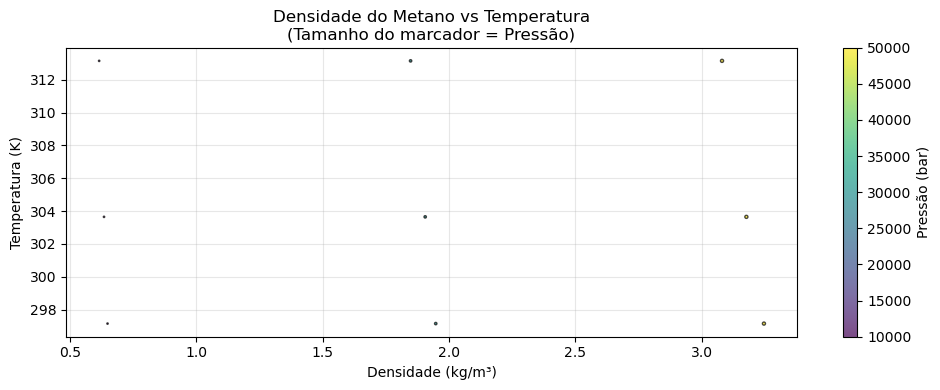

In [162]:
fig, ax = plt.subplots(figsize=(10, 4))
scatter = ax.scatter(rho_list, T_data, 
                     s=[p/1e4 for p in P_data], 
                     c=P_data, cmap='viridis', alpha=0.7, edgecolors='black')

ax.set_xlabel('Densidade (kg/m³)')
ax.set_ylabel('Temperatura (K)')
ax.set_title('Densidade do Metano vs Temperatura\n(Tamanho do marcador = Pressão)')

cbar = plt.colorbar(scatter, ax=ax, label='Pressão (bar)')
cbar.ax.xaxis.set_label_position('bottom')

ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Agora, vamos calcular para todas as condições

In [170]:
Q_297K_1bar = calcula_vazao_volumetrica(Cd, Y, A, sinal_delta_P, rho_list[0])
Q_297K_3bar = calcula_vazao_volumetrica(Cd, Y, A, sinal_delta_P, rho_list[1])
Q_297K_5bar = calcula_vazao_volumetrica(Cd, Y, A, sinal_delta_P, rho_list[2])
Q_203K_1bar = calcula_vazao_volumetrica(Cd, Y, A, sinal_delta_P, rho_list[3])
Q_203K_3bar = calcula_vazao_volumetrica(Cd, Y, A, sinal_delta_P, rho_list[4])
Q_203K_5bar = calcula_vazao_volumetrica(Cd, Y, A, sinal_delta_P, rho_list[5])
Q_313K_1bar = calcula_vazao_volumetrica(Cd, Y, A, sinal_delta_P, rho_list[6])
Q_313K_3bar = calcula_vazao_volumetrica(Cd, Y, A, sinal_delta_P, rho_list[7])
Q_313K_5bar = calcula_vazao_volumetrica(Cd, Y, A, sinal_delta_P, rho_list[8])   

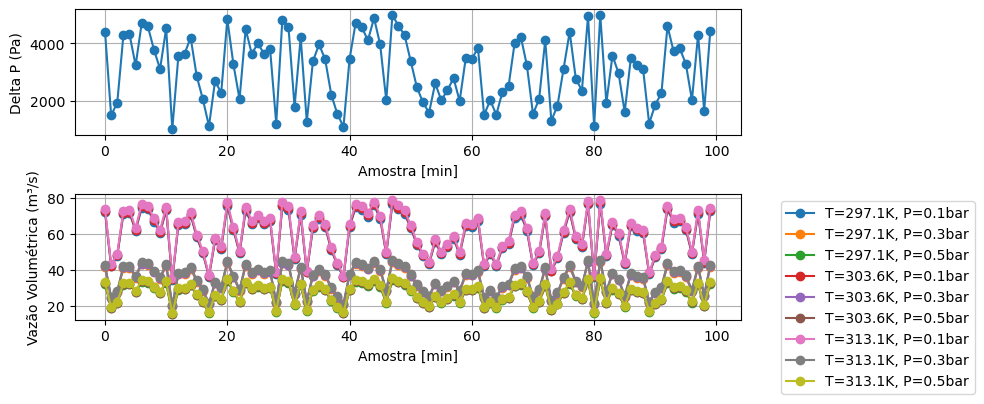

In [171]:
fig, axs = plt.subplots(2, 1, figsize=(10, 4))
axs[0].plot(sinal_delta_P, 'o-')
axs[0].set_xlabel('Amostra [min]')
axs[0].set_ylabel('Delta P (Pa)')
axs[0].grid()
for T, P, rho in zip(T_data, P_data, rho_list):
    axs[1].plot(calcula_vazao_volumetrica(Cd, Y, A, sinal_delta_P, rho), 'o-', 
                label='T={:.1f}K, P={:.1f}bar'.format(T, P/1e5))
axs[1].set_xlabel('Amostra [min]')
axs[1].set_ylabel('Vazão Volumétrica (m³/s)')
axs[1].grid()
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

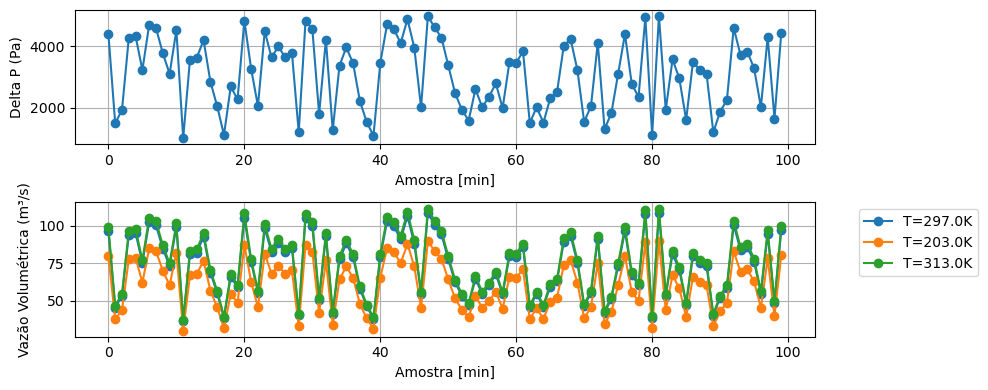

In [177]:
fig, axs = plt.subplots(2, 1, figsize=(10, 4))
axs[0].plot(sinal_delta_P, 'o-')
axs[0].set_xlabel('Amostra [min]')
axs[0].set_ylabel('Delta P (Pa)')
axs[0].grid()
for T in [297, 203, 313]:
    axs[1].plot(calcula_vazao_volumetrica(Cd, Y, A, sinal_delta_P, 
                                          rho_gas_ideal(1e4-sinal_delta_P, mm_methane, T)),
                'o-', 
                label='T={:.1f}K'.format(T))
axs[1].set_xlabel('Amostra [min]')
axs[1].set_ylabel('Vazão Volumétrica (m³/s)')
axs[1].grid()
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [94]:
from CoolProp.CoolProp import PropsSI
print(PropsSI.__doc__)

PropsSI(in1, in2, in3=None, in4=None, in5=None, in6=None, in7=None)

A Python wrapper of C++ function :cpapi:`CoolProp::PropsSI` .


Observe nas condições de contor e média do problema, sabendo que há variação de temperatura local de 20 à 40ºC.

In [144]:
T_list = [297.15, 303.65, 313.15]  # K (20°C, 32.5°C, 40°C)
P_list = [p * 100000 for p in [1, 3, 5]]  # Pa
T_data = []
P_data = []
rho_data = []
Y_data = []
for T in T_list:
    for P in P_list:
        T_data.append(T)
        P_data.append(P)
        
        # Obtem condições termodinâmicas do metano
        rho = PropsSI('D', 'T', T, 'P', P, 'Methane')
        rho_data.append(rho)
        Y_fac = PropsSI('Z', 'T', T, 'P', P, 'Methane')
        Y_data.append(Y_fac)

Observemos a relação das propriedades do gás, em relação à P e T

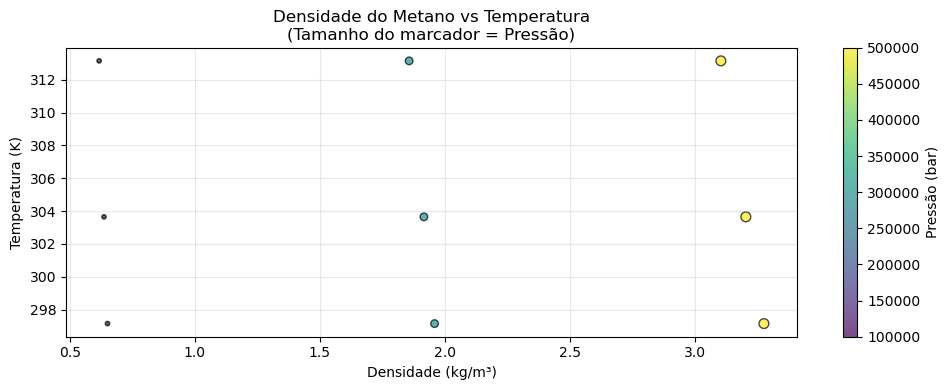

In [145]:
fig, ax = plt.subplots(figsize=(10, 4))
scatter = ax.scatter(rho_data, T_data, 
                     s=[p/1e4 for p in P_data], 
                     c=P_data, cmap='viridis', alpha=0.7, edgecolors='black')

ax.set_xlabel('Densidade (kg/m³)')
ax.set_ylabel('Temperatura (K)')
ax.set_title('Densidade do Metano vs Temperatura\n(Tamanho do marcador = Pressão)')

cbar = plt.colorbar(scatter, ax=ax, label='Pressão (bar)')
cbar.ax.xaxis.set_label_position('bottom')

ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Observe que para cada atividade, elabora-se um procedimento, e mesmo análises "repetidas" 

In [ ]:
class SensorVirtual:
    def __init__(self, Cd=0.62, A=1E-04, mm_methane=16.04, R=831.4):
        """Inicializa o sensor virtual de vazão.
        
        Parâmetros:
            Cd (float): Coeficiente de descarga (adimensional)
            A (float): Área efetiva do orifício (m²)
            mm_methane (float): Massa molar do metano (kg/kmol)
            R (float): Constante dos gases ideais (J/(kmol·K))
        """
        self.Cd = Cd
        self.A = A
        self.mm_methane = mm_methane
        self.R = R
    
    def calcula_vazao_volumetrica(self, Cd, Y, A, deltaP, rho):
        """Calcula a vazão volumétrica através de um orifício.
        
        Parâmetros:    
            Cd (float): Coeficiente de descarga (adimensional)
            Y (float): Fator de compressibilidade (adimensional)
            A (float): Área efetiva do orifício (m²)
            deltaP (float): Queda de pressão (Pa)
            rho (float): Densidade do fluido (kg/m³)

        Retornos: 
            Q (float): Vazão volumétrica (m³/s)
        """
        assert Cd > 0, "Cd deve ser maior que zero"
        Q = Cd * Y * A * (2 * deltaP / rho) ** 0.5
        return Q
    
    def rho_gas_ideal(self, P, mm, T, R=None):
        """Calcula a densidade de um gás ideal.
        
        Parâmetros:
            P (float): Pressão do gás em Pa
            mm (float): Massa molar do gás em kg/kmol
            T (float): Temperatura do gás em K
            R (float): Constante dos gases ideais em J/(kmol·K)
            
        Retorna:
            float: Densidade do gás em kg/m³
        """
        if R is None:
            R = self.R
        return (P * mm) / (R * T)
    
    def calcular_vazao_para_condicoes(self, sinal_delta_P, T_list, P_list, Y=1.0):
        """Calcula a vazão para diferentes condições de temperatura e pressão.
        
        Parâmetros:
            sinal_delta_P (array): Sinal de diferencial de pressão (Pa)
            T_list (list): Lista de temperaturas (K)
            P_list (list): Lista de pressões (Pa)
            Y (float): Fator de compressibilidade (adimensional)
            
        Retorna:
            dict: Dicionário com as vazões calculadas para cada condição
        """
        vazoes = {}
        
        for T in T_list:
            for P in P_list:
                rho = self.rho_gas_ideal(P, self.mm_methane, T)
                vazao = self.calcula_vazao_volumetrica(self.Cd, Y, self.A, sinal_delta_P, rho)
                key = f"T_{T}K_P_{P/1000:.0f}kPa"
                vazoes[key] = vazao
                
        return vazoes
    
    def calcular_vazao_coolprop(self, sinal_delta_P, T_list, P_list):
        """Calcula a vazão usando propriedades do CoolProp.
        
        Parâmetros:
            sinal_delta_P (array): Sinal de diferencial de pressão (Pa)
            T_list (list): Lista de temperaturas (K)
            P_list (list): Lista de pressões (Pa)
            
        Retorna:
            dict: Dicionário com as vazões calculadas usando CoolProp
        """
        vazoes_coolprop = {}
        
        for T in T_list:
            for P in P_list:
                rho = PropsSI('D', 'T', T, 'P', P, 'Methane')
                Y_fac = PropsSI('Z', 'T', T, 'P', P, 'Methane')
                vazao = self.calcula_vazao_volumetrica(self.Cd, Y_fac, self.A, sinal_delta_P, rho)
                key = f"T_{T}K_P_{P/100000:.0f}bar_CoolProp"
                vazoes_coolprop[key] = vazao
                
        return vazoes_coolprop

### Paradigma procedural vs. orientado a objetos

- O paradigma procedural organiza o código em funções e procedimentos, com dados e lógica separados.
- O paradigma orientado a objetos organiza o código em "objetos", que agrupam dados e comportamentos relacionados.

#### Vantagens práticas do paradigma orientado a objetos:
- Facilita a manutenção e evolução do código.
- Permite reutilização e extensão de funcionalidades.
- Torna o código mais próximo do mundo real, facilitando o entendimento.

#### Implicações nas nossas atividades:
- Projetos maiores e mais complexos se beneficiam da organização OO.
- Pequenos scripts podem ser mais simples no procedural, mas OO traz vantagens à medida que o projeto cresce.

slideshow: {"slide_type": "slide"}

#### Exemplo ilustrativo: Equação de estado dos gases ideais

<img src="Equacoes_de_estado.png" alt="Equações de estado - Exemplo ilustrativo" style="max-width: 100%; height: auto;">

slideshow: {"slide_type": "slide"}

In [2]:
# Paradigma Procedural: exemplo prático

# Cálculo do volume molar usando a equação de estado dos gases ideais
R = 0.0821  # constante dos gases (L.atm)/(mol.K)
T = 300     # temperatura (K)
P = 10      # pressão (atm)

# Procedimento procedural

def calc_volume_molar_ideal(T, P):
    return R * T / P

Vm = calc_volume_molar_ideal(T, P)

print(f"Volume molar (procedural): {Vm:.2f} L/mol")

#slideshow: {"slide_type": "slide"}

Volume molar (procedural): 2.46 L/mol


## Paradigma Orientado a Objetos: exemplo prático

Veja como o mesmo cálculo pode ser organizado usando o paradigma orientado a objetos.

slideshow: {"slide_type": "slide"}

## Discussão prática

Compare os dois exemplos acima:
- O procedural é direto, mas difícil de expandir para outros tipos de gases ou equações.
- O orientado a objetos permite criar novos métodos e reutilizar o código facilmente.

### Perguntas para reflexão
- Em que situações o procedural é suficiente?
- Quando vale a pena usar OO?
- Como a organização do código impacta a manutenção e evolução dos projetos?

slideshow: {"slide_type": "slide"}

In [ ]:
# Paradigma Orientado a Objetos: exemplo prático

class GasIdeal:
    def __init__(self, R=0.0821):
        self.R = R
    def calc_volume_molar(self, T, P):
        return self.R * T / P

gas = GasIdeal()

Vm_oo = gas.calc_volume_molar(T, P)

print(f"Volume molar (orientado a objetos): {Vm_oo:.2f} L/mol")

#slideshow: {"slide_type": "slide"}

## Exemplo prático: Sensor virtual de vazão de gás

Imagine que precisamos criar um sensor virtual para estimar a vazão de um gás em diferentes condições de operação. Com orientação a objetos, podemos criar uma classe que representa o sensor e encapsula toda a lógica necessária, facilitando a manutenção e expansão do código.

slideshow: {"slide_type": "slide"}

In [ ]:
# Classe para sensor virtual de vazão de gás

class SensorVirtualVazao:
    def __init__(self, R=0.0821):
        self.R = R
    def calc_volume_molar(self, T, P):
        return self.R * T / P
    def estimar_vazao(self, T, P, n, dt):
        Vm = self.calc_volume_molar(T, P)
        return n * Vm / dt  # vazão em L/s



# Exemplo de uso:

sensor = SensorVirtualVazao()

T = 320  # K

P = 8    # atm

n = 0.5  # mols de gás

dt = 10  # intervalo de tempo em segundos



vazao = sensor.estimar_vazao(T, P, n, dt)

print(f"Vazão estimada: {vazao:.2f} L/s")